### Initialize Graphlab Create

In [40]:
import graphlab as gl

### Import all the data from NASA's original files into SFrames (Graphlab's native datastructure)

In [2]:
train_data=gl.SFrame.read_csv('train_FD001.txt',delimiter=' ' ,header=False)
train_data.append(gl.SFrame.read_csv('train_FD002.txt',delimiter=' ' ,header=False))
train_data.append(gl.SFrame.read_csv('train_FD003.txt',delimiter=' ' ,header=False))
train_data.append(gl.SFrame.read_csv('train_FD004.txt',delimiter=' ' ,header=False))
                  
test_data=gl.SFrame.read_csv('test_FD001.txt',delimiter=' ' ,header=False)
test_data.append(gl.SFrame.read_csv('test_FD002.txt',delimiter=' ' ,header=False))
test_data.append(gl.SFrame.read_csv('test_FD003.txt',delimiter=' ' ,header=False))
test_data.append(gl.SFrame.read_csv('test_FD004.txt',delimiter=' ' ,header=False))

Truth=gl.SFrame.read_csv('RUL_FD001.txt',delimiter=' ' ,header=False)
Truth.append(gl.SFrame.read_csv('RUL_FD002.txt',delimiter=' ' ,header=False))
Truth.append(gl.SFrame.read_csv('RUL_FD003.txt',delimiter=' ' ,header=False))
Truth.append(gl.SFrame.read_csv('RUL_FD004.txt',delimiter=' ' ,header=False))

2016-04-13 12:51:46,472 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1460544704.log


Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD001.txt

Parsing completed. Parsed 100 lines in 0.057213 secs.

This non-commercial license of GraphLab Create is assigned to njain@kth.se and will expire on October 20, 2016. For commercial licensing options, visit https://dato.com/buy/.
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD001.txt

Parsing completed. Parsed 20631 lines in 0.091214 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD002.txt

Parsing completed. Parsed 100 lines in 0.102 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD002.txt

Parsing completed. Parsed 53759 lines in 0.207506 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD003.txt

Parsing completed. Parsed 100 lines in 0.053315 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD003.txt

Parsing completed. Parsed 24720 lines in 0.088727 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD004.txt

Parsing completed. Parsed 100 lines in 0.116281 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/train_FD004.txt

Parsing completed. Parsed 61249 lines in 0.234115 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD001.txt

Parsing completed. Parsed 100 lines in 0.029889 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD001.txt

Parsing completed. Parsed 13096 lines in 0.049755 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD002.txt

Parsing completed. Parsed 100 lines in 0.081639 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD002.txt

Parsing completed. Parsed 33991 lines in 0.151934 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD003.txt

Parsing completed. Parsed 100 lines in 0.046614 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD003.txt

Parsing completed. Parsed 16596 lines in 0.071826 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD004.txt

Parsing completed. Parsed 100 lines in 0.091377 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/test_FD004.txt

Parsing completed. Parsed 41214 lines in 0.17165 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD001.txt

Parsing completed. Parsed 100 lines in 0.010875 secs.


Inferred types from first line of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD001.txt

Parsing completed. Parsed 100 lines in 0.012055 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD002.txt

Parsing completed. Parsed 100 lines in 0.012315 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD002.txt

Parsing completed. Parsed 259 lines in 0.011031 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD003.txt

Parsing completed. Parsed 100 lines in 0.012361 secs.


Inferred types from first line of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD003.txt

Parsing completed. Parsed 100 lines in 0.011234 secs.

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD004.txt

Parsing completed. Parsed 100 lines in 0.013363 secs.


Inferred types from first line of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/nicolas/OneDrive/Combient/CMAPSSData/RUL_FD004.txt

Parsing completed. Parsed 248 lines in 0.010516 secs.


Inferred types from first line of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


X1
112
98
69
82
91
93
91
95
111
96


### Rename the columns of the SFrames

In [3]:
Truth.rename({'X1':'RUL_maxcycle'})
col_renaming_dict={'X1':'id' , 'X2':'cycle'}
col_renaming_dict.update({'X3':'setting1' , 'X4':'setting2', 'X5':'setting3'})
for i in xrange(1,22):
    col_renaming_dict.update({'X'+str(i+5) : 's'+str(i)}) 
train_data.rename(col_renaming_dict)
test_data.rename(col_renaming_dict)
train_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08
1,4,0.0007,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.0,2388.06
1,6,-0.0043,-0.0001,100.0,518.67,642.1,1584.47,1398.37,14.62,21.61,554.67,2388.02
1,7,0.001,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.0
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.8,14.62,21.61,553.69,2388.05
1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05


In [4]:
test_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01
1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05
1,4,0.0042,0.0,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03
1,5,0.0014,0.0,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01
1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.0
1,7,-0.0,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05
1,8,0.0006,-0.0,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05
1,9,-0.0036,0.0,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06
1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04


### Calculate the RUL
First, find the maximum cycle for each engine (corresponding to a failure in the trainning data). 
Then compute the RUL for engine and cycle.

In [5]:
fault_cycle=train_data.groupby('id',operations={'Fault_cycle' : gl.aggregate.MAX('cycle')})
train_data=train_data.join(fault_cycle)
train_data['RUL']=train_data.apply(lambda x: x['Fault_cycle']-x['cycle'])
train_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08
1,4,0.0007,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.0,2388.06
1,6,-0.0043,-0.0001,100.0,518.67,642.1,1584.47,1398.37,14.62,21.61,554.67,2388.02
1,7,0.001,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.0
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.8,14.62,21.61,553.69,2388.05
1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05


### Prepare the test data
The truth tell us the RUL for each engine after the last run of each engine in the test data. 
We join this information to the test table and then calculate the RUL for each engine and cycle (as in train data). 

In [6]:
Truth['id']=range(1,len(Truth)+1)
test_data=test_data.join(Truth)

last_test_cycle=test_data.groupby('id',operations={'Last_test_cycle' : gl.aggregate.MAX('cycle')})
test_data=test_data.join(last_test_cycle)
test_data['RUL']=test_data.apply(lambda x: x['RUL_maxcycle']-x['cycle']+x['Last_test_cycle'])

test_data.show()

Canvas is accessible via web browser at the URL: http://localhost:54630/index.html
Opening Canvas in default web browser.


### Creating the labels from RUL

In [42]:
w1=30
w0=15

train_data['label1']=train_data.apply(lambda x: 0 if x['RUL']>w1 else 1)
train_data['label2']=train_data.apply(lambda x: x['label1'] if x['RUL']>w0 else 2)
test_data['label1']=test_data.apply(lambda x: 0 if x['RUL']>w1 else 1)
test_data['label2']=test_data.apply(lambda x: x['label1'] if x['RUL']>w0 else 2)   


### Feature engineering

In [43]:
def build_features(data):
    #Means & Std
    windowsStart = -2
    windowsStop = 2

    cols=list()
    for i in xrange(1,22):
        cols.append('s'+str(i)) 
    col_id_cycle=cols
    col_id_cycle.append('id')
    col_id_cycle.append('cycle')
    
    IDs=data['id'].unique()
    CollectFrame=gl.SFrame()
    for IDx in IDs:
        tmpFrame=data[data['id']==IDx][col_id_cycle].sort('cycle', ascending = True)
        for col in cols:
            tmpFrame['mean_'+col]=tmpFrame[col].rolling_mean(windowsStart,windowsStop)
            tmpFrame['stdv_'+col]=tmpFrame[col].rolling_stdv(windowsStart,windowsStop)   
        CollectFrame=CollectFrame.append(tmpFrame)
    data=data.join(CollectFrame)
    
    for col in cols:
        #These line fill missing data left by the rolling mean and stdv at the edges of each block
        data['mean_'+col]=data[{col , 'mean_'+col , 'stdv_'+col}].apply(lambda x :  x[col] if x['mean_'+col] is None  else  x['mean_'+col])    
        data['stdv_'+col]=data[{col , 'mean_'+col , 'stdv_'+col}].apply(lambda x :  0 if x['stdv_'+col] is None  else  x['stdv_'+col])

    return data

In [44]:
train_data=build_features(train_data)
test_data=build_features(test_data)

In [10]:
train_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
71,1,0.0027,-0.0004,100.0,518.67,642.64,1581.95,1407.04,14.62,21.61,553.56,2388.11
71,2,0.0029,-0.0003,100.0,518.67,642.82,1593.17,1403.53,14.62,21.61,553.22,2388.11
71,3,0.0007,0.0003,100.0,518.67,642.5,1582.94,1402.54,14.62,21.61,553.7,2388.11
71,4,-0.0014,0.0003,100.0,518.67,643.04,1584.9,1409.75,14.62,21.61,554.3,2388.14
71,5,0.0015,0.0001,100.0,518.67,642.0,1587.63,1400.43,14.62,21.61,553.49,2388.09
71,6,-0.0035,0.0002,100.0,518.67,642.57,1583.36,1407.16,14.62,21.61,553.27,2388.14
71,7,-0.0025,-0.0003,100.0,518.67,641.74,1592.03,1404.49,14.62,21.61,554.5,2388.17
71,8,-0.0013,0.0001,100.0,518.67,642.65,1586.46,1407.86,14.62,21.61,553.66,2388.12
71,9,-0.0049,0.0004,100.0,518.67,642.1,1578.86,1402.6,14.62,21.61,553.17,2388.09
71,10,-0.0003,0.0,100.0,518.67,642.95,1593.6,1405.47,14.62,21.61,553.5,2388.1


### Create a list of features to be used for training

In [11]:
features_to_train=list()
features_to_train.append('cycle')
for i in xrange(1,3):
    features_to_train.append( 'setting'+str(i) )
for i in xrange(1,22):
    features_to_train.append('s'+str(i)) 
    features_to_train.append('mean_s'+str(i))
    features_to_train.append('stdv_s'+str(i))

In [12]:
train,validation = train_data.random_split(0.8,seed=0)

In [13]:
import numpy as np
lambdas=np.logspace(-3,8,num=20)
err = 0*lambdas

In [14]:
for i,l in enumerate(lambdas):
    model=gl.logistic_classifier.create(train,'label2',features_to_train,validation_set=None,l2_penalty=l,class_weights='auto')
    err[i]=model.evaluate(validation)['accuracy']
    


WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.225773     | 0.892463          |

| 2         | 3        | 1.362280     | 0.880514          |

| 3         | 4        | 1.505968     | 0.880454          |

| 4         | 5        | 1.654690     | 0.880514          |

| 5         | 6        | 1.793538     | 0.880393          |

| 6         | 7        | 1.917475     | 0.880393          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.218152     | 0.881721          |

| 2         | 3        | 0.338421     | 0.855289          |

| 3         | 4        | 0.461945     | 0.847987          |

| 4         | 5        | 0.592019     | 0.846298          |

| 5         | 6        | 0.715120     | 0.846117          |

| 6         | 7        | 0.865294     | 0.846117          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.210821     | 0.851005          |

| 2         | 3        | 0.330399     | 0.809305          |

| 3         | 4        | 0.450544     | 0.799891          |

| 4         | 5        | 0.579807     | 0.798443          |

| 5         | 6        | 0.714788     | 0.798322          |

| 6         | 7        | 0.841680     | 0.798322          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.195182     | 0.811176          |

| 2         | 3        | 0.323926     | 0.773037          |

| 3         | 4        | 0.441128     | 0.768149          |

| 4         | 5        | 0.560414     | 0.767425          |

| 5         | 6        | 0.684055     | 0.767546          |

| 6         | 7        | 0.804595     | 0.767546          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.191905     | 0.786494          |

| 2         | 3        | 0.316738     | 0.757830          |

| 3         | 4        | 0.441777     | 0.755114          |

| 4         | 5        | 0.556356     | 0.755054          |

| 5         | 6        | 0.676153     | 0.755175          |

| 6         | 7        | 0.795807     | 0.755175          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.194292     | 0.775149          |

| 2         | 3        | 0.320081     | 0.750769          |

| 3         | 4        | 0.445886     | 0.748356          |

| 4         | 5        | 0.572502     | 0.748356          |

| 5         | 6        | 0.695677     | 0.748356          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.191946     | 0.770503          |

| 2         | 3        | 0.306779     | 0.746847          |

| 3         | 4        | 0.424905     | 0.744493          |

| 4         | 5        | 0.540710     | 0.744433          |

| 5         | 6        | 0.673279     | 0.744433          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.195017     | 0.764830          |

| 2         | 3        | 0.312338     | 0.742261          |

| 3         | 4        | 0.430997     | 0.741717          |

| 4         | 5        | 0.550442     | 0.741717          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.206995     | 0.749744          |

| 2         | 3        | 0.329189     | 0.735441          |

| 3         | 4        | 0.446810     | 0.735381          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.220946     | 0.710458          |

| 2         | 3        | 0.343381     | 0.706717          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.237797     | 0.672078          |

| 2         | 3        | 0.391646     | 0.674069          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.228561     | 0.648362          |

| 2         | 3        | 0.383936     | 0.649931          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.196912     | 0.639491          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.211841     | 0.637016          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.195794     | 0.636292          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.203569     | 0.636172          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.204147     | 0.636292          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.187304     | 0.637198          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.187262     | 0.641905          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 16571

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.192103     | 0.656870          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

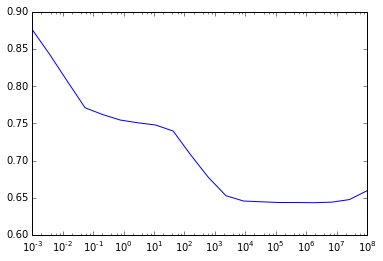

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.semilogx(lambdas,err)



In [16]:
model=gl.logistic_classifier.create(train_data,'label2',features_to_train,validation_set=None,l2_penalty=1e4,class_weights='auto')
model.evaluate(train_data)


WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 20631

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.230700     | 0.645776          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

{'accuracy': 0.6457757743201977,
 'auc': 0.7753702493813891,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      2       |        1        |  787  |
 |      1       |        1        |  829  |
 |      1       |        2        |  532  |
 |      1       |        0        |  139  |
 |      0       |        1        |  3653 |
 |      2       |        0        |   63  |
 |      0       |        2        |  2134 |
 |      0       |        0        | 11744 |
 |      2       |        2        |  750  |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.44693595785258133,
 'log_loss': 1.0949448502374475,
 'precision': 0.4533269890441651,
 'recall': 0.5637719008866833,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003


In [17]:
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 

def gl_confmatrix_2_confmatrix(sf):
    Nlabels=max(len(sf['target_label'].unique()),len(sf['predicted_label'].unique()))
    matrix=np.zeros([3,3],dtype=np.float)
    for i in sf:
        matrix[i['target_label'],i['predicted_label']]=i['count']
    sum
    
    row_sums = matrix.sum(axis=1) 
    matrix=matrix / row_sums[:, np.newaxis]
    matrix*=100
    
    plt.figure(figsize=(3, 3))
    dims = (8,8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(matrix, annot=True,  fmt='.2f', xticklabels=['0' ,'1','2'], yticklabels=['0' ,'1','2']);
    plt.title('Confusion Matrix');
    
    return matrix

:0: FutureWarning: IPython widgets are experimental and may change in the future.


array([[ 66.9899036 ,  20.83737379,  12.17272261],
       [  9.26666667,  55.26666667,  35.46666667],
       [  3.9375    ,  49.1875    ,  46.875     ]])

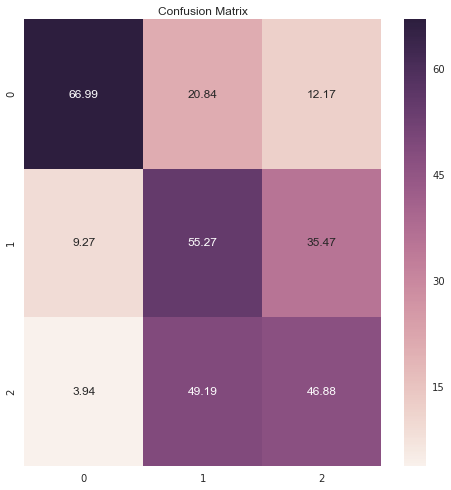

In [19]:
gl_confmatrix_2_confmatrix(conf_matrix_train)    

array([[ 77.08398621,  14.43904732,   8.47696647],
       [ 15.07352941,  42.64705882,  42.27941176],
       [  0.        ,  28.33333333,  71.66666667]])

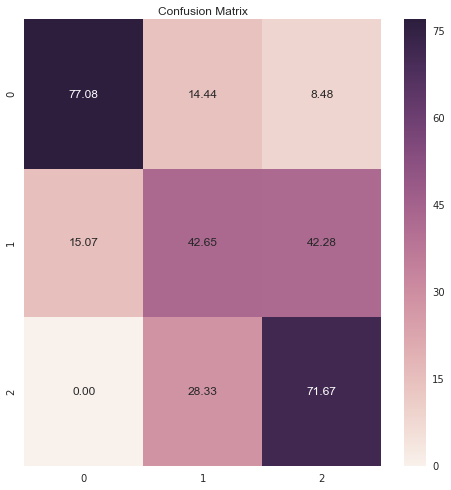

In [20]:
gl_confmatrix_2_confmatrix(conf_matrix_test)    

WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 20631

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.230478     | 0.867190          |

| 2         | 3        | 0.373642     | 0.829625          |

| 3         | 4        | 0.519299     | 0.821385          |

| 4         | 5        | 0.659726     | 0.819640          |

| 5         | 6        | 0.803624     | 0.819543          |

| 6         | 7        | 0.948304     | 0.819543          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

array([[ 92.70604826,   7.18426825,   0.10968348],
       [ 20.22058824,  57.35294118,  22.42647059],
       [  0.        ,  20.        ,  80.        ]])

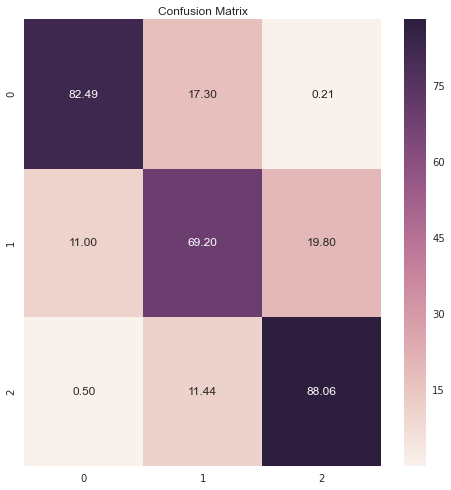

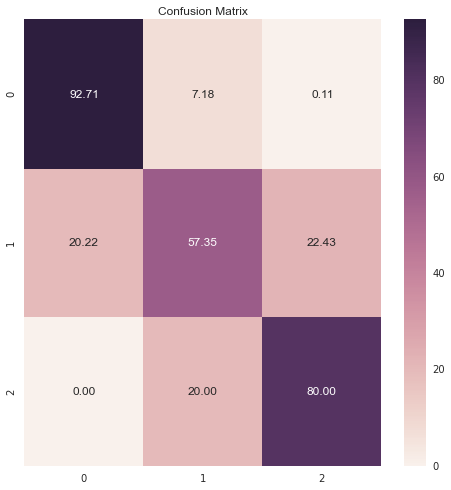

In [21]:
model=gl.logistic_classifier.create(train_data,'label2',features_to_train,validation_set=None,class_weights='auto')
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test)    

In [22]:
#import graphlab as gl
#train_data=gl.SFrame({'id':[1,1,1,1,1,2,2,2,2,2,2,2], 'cycle':[1,2,3,4,5,1,2,3,4,5,6,7], 's1':[1.5,1.4,1.4,1.2,1.2,1.1,1.4,1.6,1.3,1.2,1.5,1.2]})

#windowsStart = -2
#windowsStop = 2
#col='s1'

##IDs=train_data['id'].unique()
#CollectFrame=gl.SFrame()
#for IDx in IDs:
#    tmpFrame=train_data[train_data['id']==IDx]['id','cycle',col].sort('cycle', ascending = True)
#    tmpFrame['mean_'+col]=tmpFrame[col].rolling_mean(windowsStart,windowsStop)
#    tmpFrame['stdv_'+col]=tmpFrame[col].rolling_stdv(windowsStart,windowsStop)
#    tmpFrame['mean_'+col]=tmpFrame.apply(lambda x :  x[col] if x['mean_'+col] is None  else  x['mean_'+col])
#    tmpFrame['stdv_'+col]=tmpFrame.apply(lambda x :  0 if x['stdv_'+col] is None  else  x['stdv_'+col])
    
#    CollectFrame=CollectFrame.append(tmpFrame)
#train_data.join(CollectFrame)

In [23]:
#train_data.show()

In [24]:
#train_data[1]['id']=2

In [25]:
#train_data

In [26]:
model=gl.random_forest_classifier.create(train_data,'label2',features_to_train,validation_set=None,num_trees=10,class_weights='auto')

WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Random forest classifier:

--------------------------------------------------------

Number of examples          : 20631

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.066123     | 0.907114          | 0.401556          |

| 2         | 0.125175     | 0.912662          | 0.393752          |

| 3         | 0.188782     | 0.916880          | 0.387725          |

| 4         | 0.249680     | 0.914956          | 0.386448          |

| 5         | 0.313478     | 0.915136          | 0.387014          |

| 6         | 0.377549     | 0.914793          | 0.385872          |

+-----------+--------------+-------------------+-------------------+

In [27]:
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))

array([[ 91.06154811,   8.93845189,   0.        ],
       [  0.6       ,  94.33333333,   5.06666667],
       [  0.        ,   9.75      ,  90.25      ]])

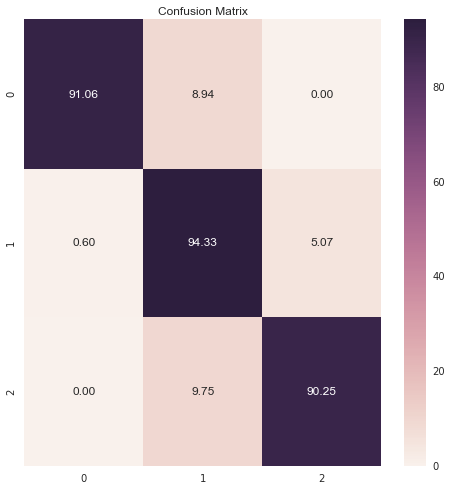

In [28]:
gl_confmatrix_2_confmatrix(conf_matrix_train)    

array([[  9.68896898e+01,   3.10247571e+00,   7.83453463e-03],
       [  1.06617647e+01,   8.56617647e+01,   3.67647059e+00],
       [  0.00000000e+00,   4.00000000e+01,   6.00000000e+01]])

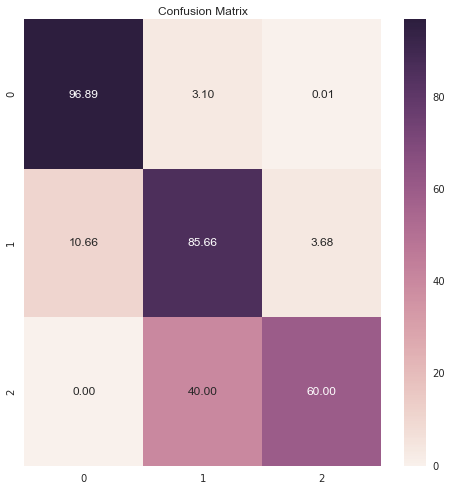

In [29]:
gl_confmatrix_2_confmatrix(conf_matrix_test)    

In [30]:
model=gl.boosted_trees_classifier.create(train_data,'label2',features_to_train,validation_set=None,class_weights='auto')

WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 20631

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.069787     | 0.908040          | 0.798087          |

| 2         | 0.143097     | 0.918384          | 0.616081          |

| 3         | 0.217939     | 0.922869          | 0.494232          |

| 4         | 0.293582     | 0.926619          | 0.409564          |

| 5         | 0.373075     | 0.931366          | 0.346890          |

| 6         | 0.446048     | 0.935643          | 0.301157          |

+-----------+--------------+-------------------+-------------------+

array([[ 93.41737494,   6.58262506,   0.        ],
       [  0.53333333,  97.2       ,   2.26666667],
       [  0.        ,   6.25      ,  93.75      ]])

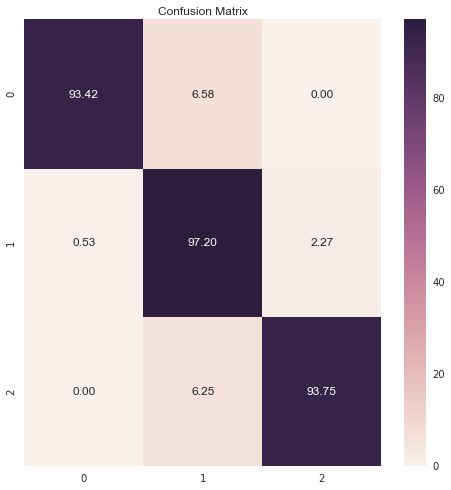

In [31]:
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    

array([[  9.77358195e+01,   2.25634597e+00,   7.83453463e-03],
       [  1.65441176e+01,   7.79411765e+01,   5.51470588e+00],
       [  0.00000000e+00,   3.50000000e+01,   6.50000000e+01]])

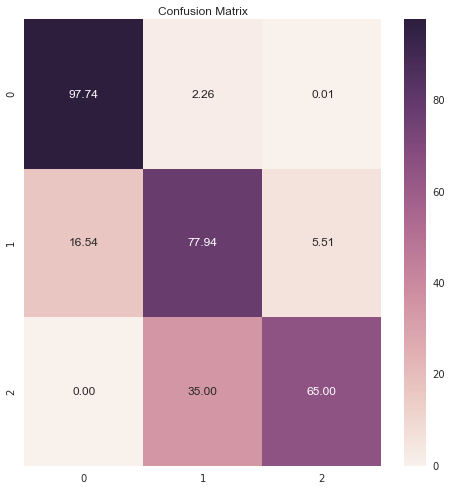

In [32]:
gl_confmatrix_2_confmatrix(conf_matrix_test)    

In [33]:
#model=gl.nearest_neighbor_classifier.create(train_data,'label2',features_to_train)

In [34]:
#conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
#conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
#gl_confmatrix_2_confmatrix(conf_matrix_test)    

array([[ 93.41737494,   6.58262506,   0.        ],
       [  0.53333333,  97.2       ,   2.26666667],
       [  0.        ,   6.25      ,  93.75      ]])

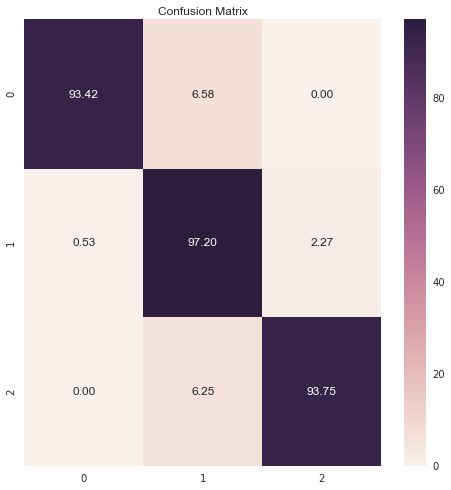

In [35]:
gl_confmatrix_2_confmatrix(conf_matrix_train)    

In [36]:
model2=gl.linear_regression.create(train_data,'RUL',features_to_train)

WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Linear regression:

--------------------------------------------------------

Number of examples          : 19666

Number of features          : 66

Number of unpacked features : 66

Number of coefficients    : 67

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.057754     | 188.233642         | 186.216521           | 39.912159     | 40.556823       |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [37]:
model2.predict(train_data)

dtype: float
Rows: 20631
[183.16997850896678, 178.8515275668724, 168.3889958040918, 168.99564893793922, 168.57577729630066, 164.62181444151793, 164.57532378544965, 161.27888677401097, 162.60526092280907, 157.31350533399018, 159.0145800813416, 160.37044655367845, 157.71757414834428, 158.51105437844126, 155.3510717327017, 155.95846943387642, 158.47549063602673, 161.97831129170117, 162.3011492952137, 163.24905923574534, 163.4449643448961, 160.00241698375066, 157.3370070534147, 157.42763447692596, 151.88283992662855, 149.82231461362517, 147.13696486090248, 148.52901200434644, 145.79207173159102, 146.03600497608932, 147.4080049191607, 148.5473551704854, 148.35377263944702, 147.06397889463005, 152.9601950203696, 152.90317452862564, 147.1333430388131, 148.36254040753192, 144.64587901320556, 147.2623323121643, 142.46253891388642, 149.7109328714905, 143.55747317119858, 144.6650910189892, 140.64794538712886, 140.90815977182774, 139.0474721665396, 139.03377699521752, 138.04518101809663, 135.83437

(array([   37.,   128.,   268.,   459.,  1177.,  2412.,  4623.,  6466.,
         4116.,   945.]),
 array([-188.23364207, -161.17524958, -134.11685709, -107.0584646 ,
         -80.00007211,  -52.94167961,  -25.88328712,    1.17510537,
          28.23349786,   55.29189035,   82.35028285]),
 <a list of 10 Patch objects>)

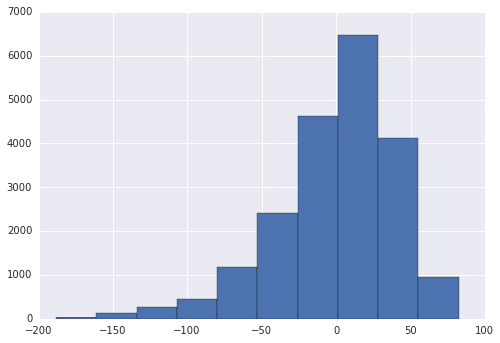

In [38]:
plt.hist(model2.predict(train_data)-train_data['RUL'])

(array([   37.,   117.,   272.,   689.,  1189.,  2000.,  3493.,  3837.,
         1233.,   229.]),
 array([-180.47753462, -152.77954772, -125.08156081,  -97.38357391,
         -69.68558701,  -41.9876001 ,  -14.2896132 ,   13.4083737 ,
          41.10636061,   68.80434751,   96.50233441]),
 <a list of 10 Patch objects>)

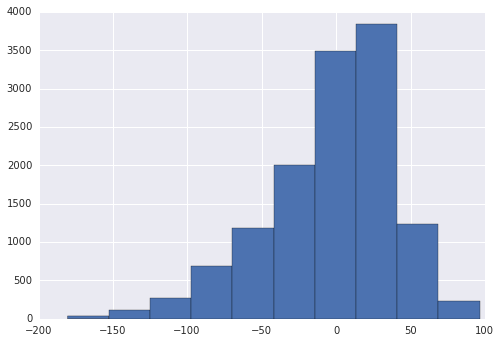

In [39]:
plt.hist(model2.predict(test_data)-test_data['RUL'])